In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
points = [18, 19, 14, 14, 11, 20, 28, 30, 31, 35, 33, 25, 25, 27, 29, 30, 19, 23]
assists = [3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14, 9, 4, 3, 4, 12, 15, 11]
rebounds = [15, 14, 10, 8, 14, 13, 9, 5, 4, 11, 6, 5, 3, 8, 12, 7, 6, 5]

df = pd.DataFrame({'points' : points, 'assists' : assists, 'rebounds' : rebounds})

df

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14
5,20,8,13
6,28,7,9
7,30,6,5
8,31,9,4
9,35,12,11


In [3]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [4]:
def kmeans(data, k, distance_func):
    centroids = data.sample(n=k).values
    prev_centroids = np.zeros(centroids.shape)

    while not np.all(centroids == prev_centroids):
        prev_centroids = centroids.copy()
        
        clusters = []
        for point in data.values:
            distances = [distance_func(point, centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        
        centroids = np.array([data.values[np.array(clusters) == i].mean(axis=0) for i in range(k)])
    
    return np.array(clusters), centroids

In [5]:
def compute_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(centroids)):
        sse += np.sum((data.values[clusters == i] - centroids[i]) ** 2)
    return sse

In [6]:
def plot_clusters(data, clusters, centroids, k, distance_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['points'], data['assists'], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    plt.title(f'K-Means Clustering with K={k} ({distance_name} Distance)')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()

In [7]:
def elbow_method(data, k_values, distance_func, distance_name):
    sse_values = []
    
    for k in k_values:
        clusters, centroids = kmeans(data, k, distance_func)
        sse = compute_sse(data, clusters, centroids)
        sse_values.append(sse)
        plot_clusters(data, clusters, centroids, k, distance_name)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_values, marker='o')
    plt.title(f'Elbow Method for Optimal K ({distance_name} Distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

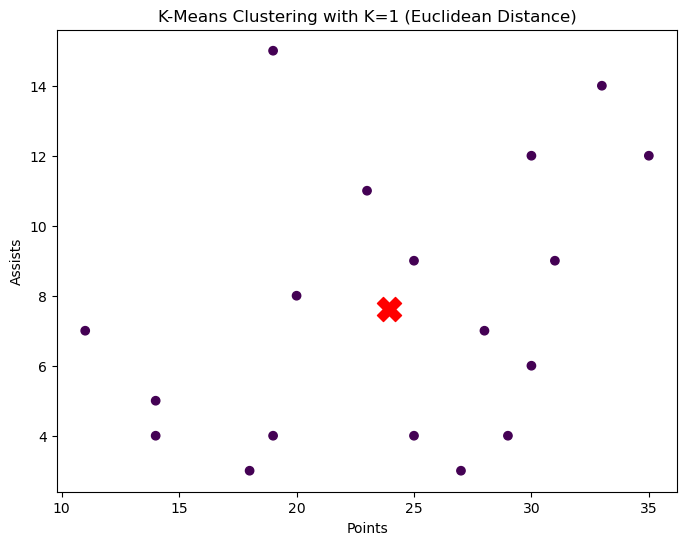

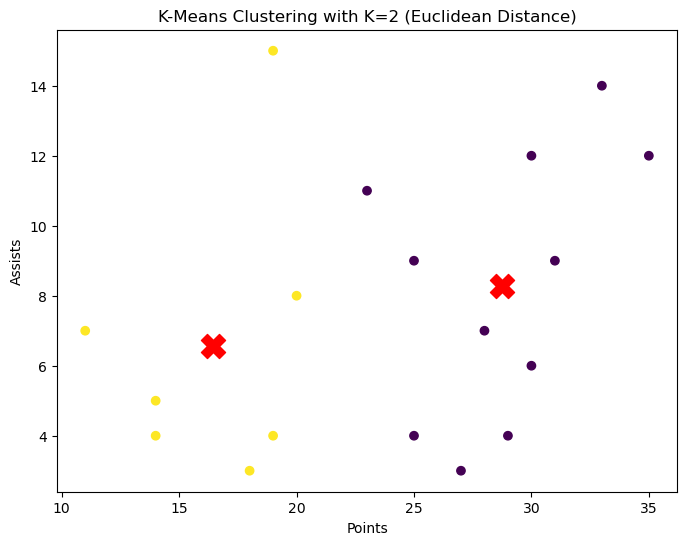

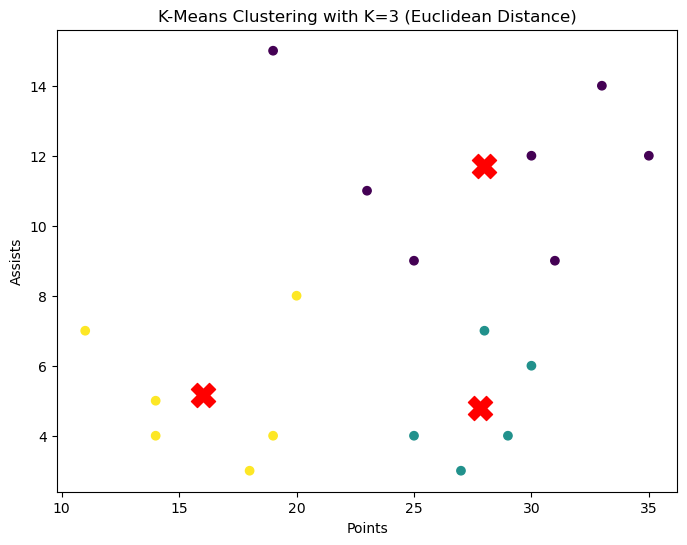

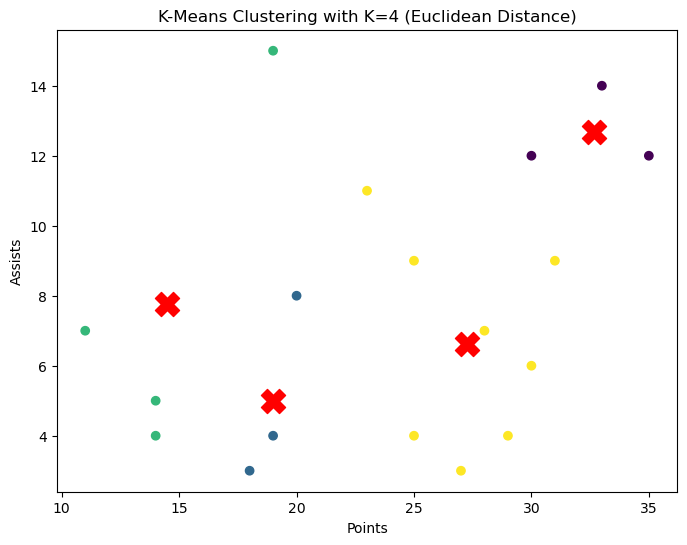

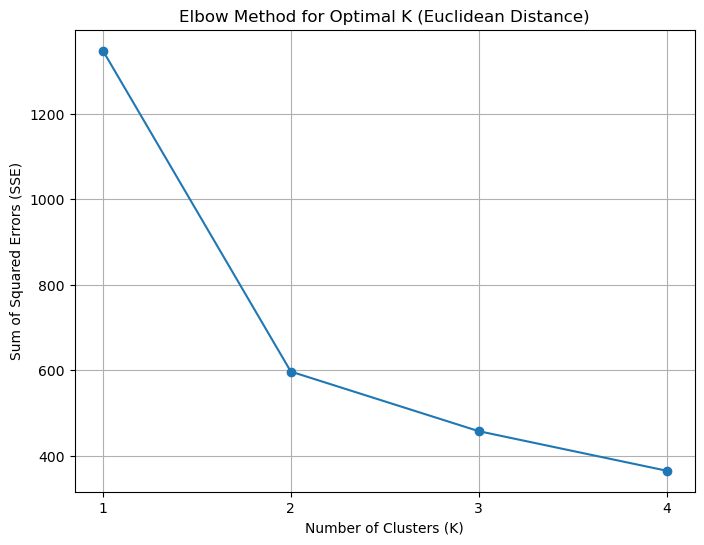

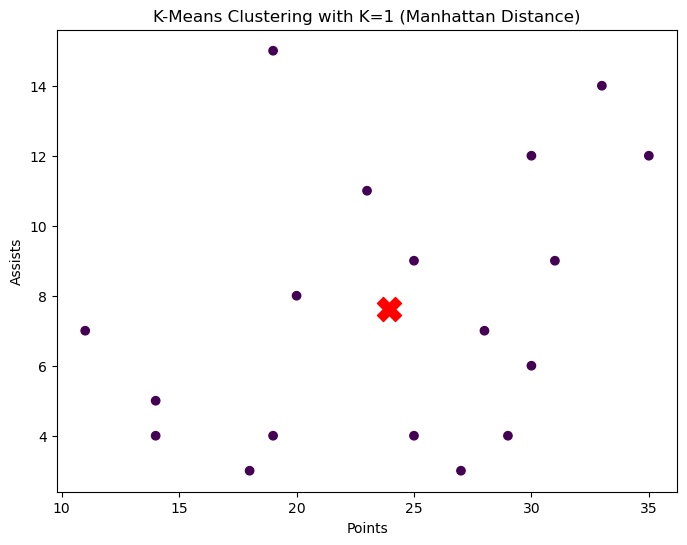

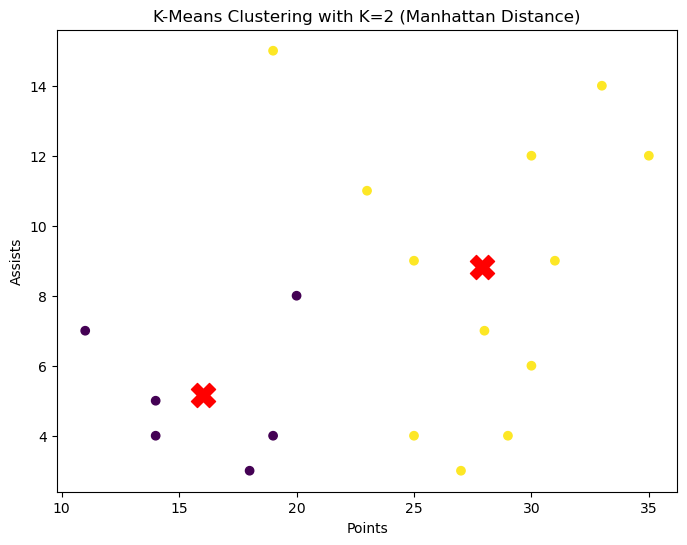

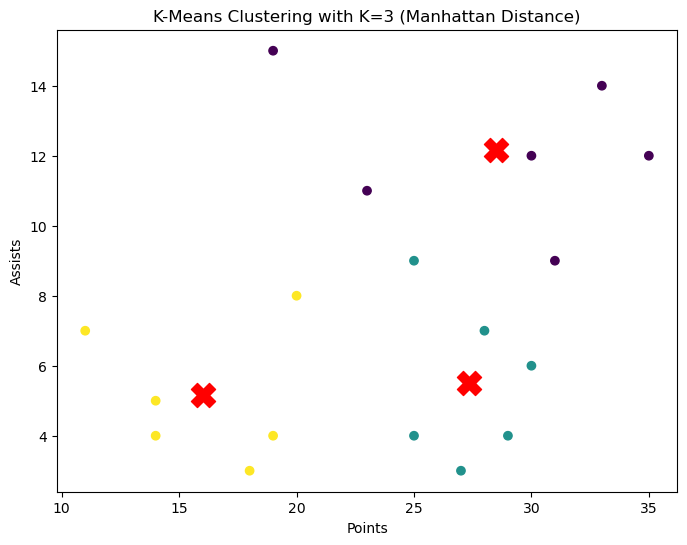

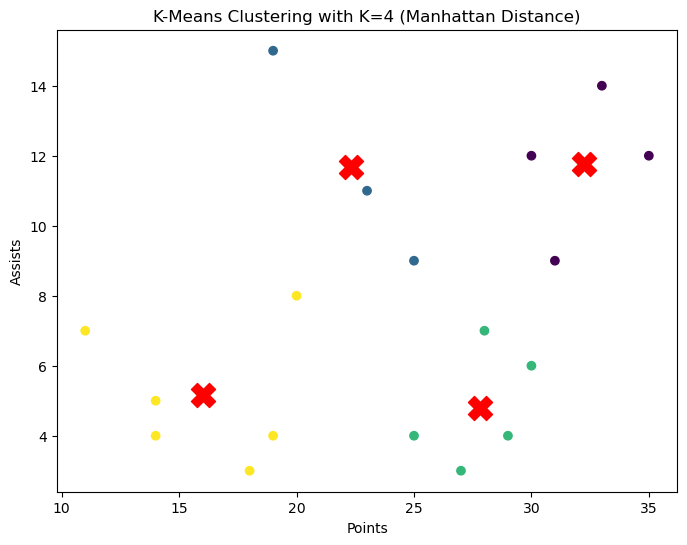

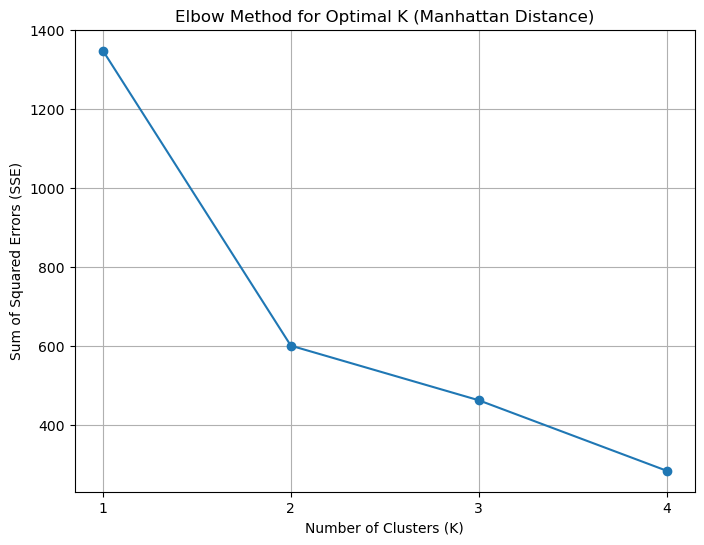

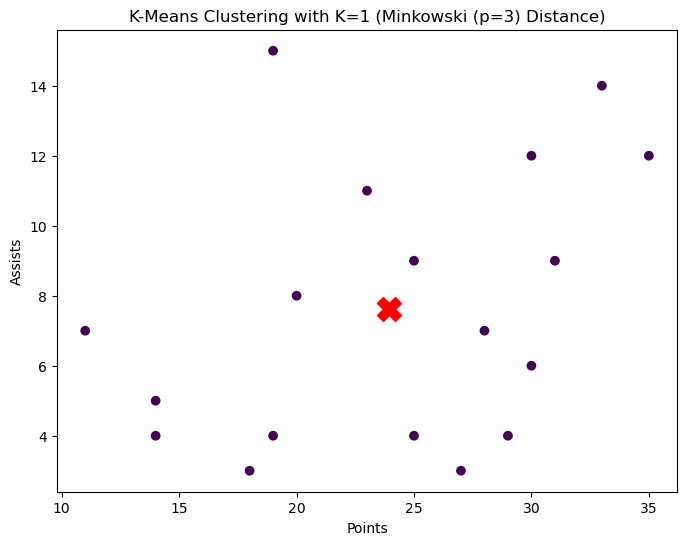

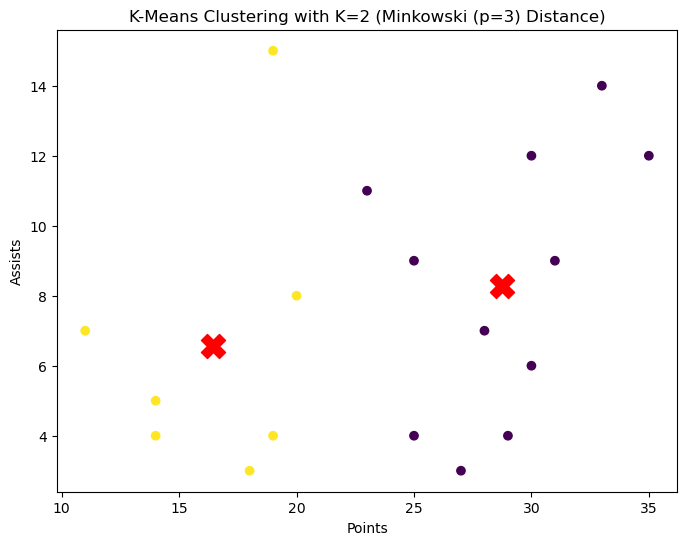

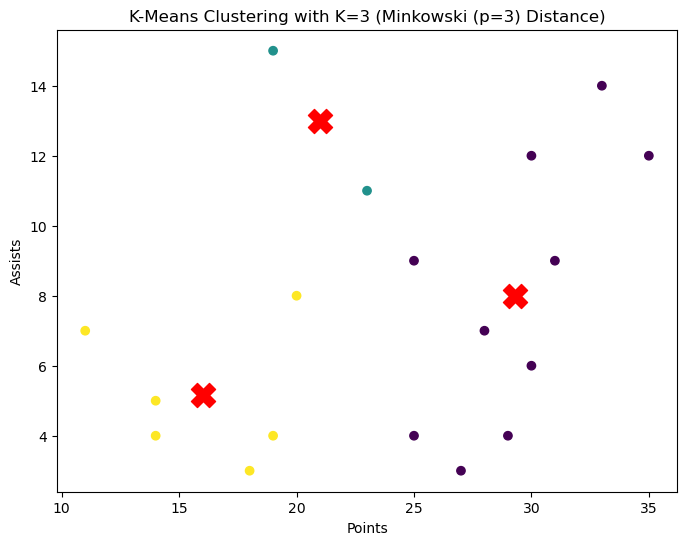

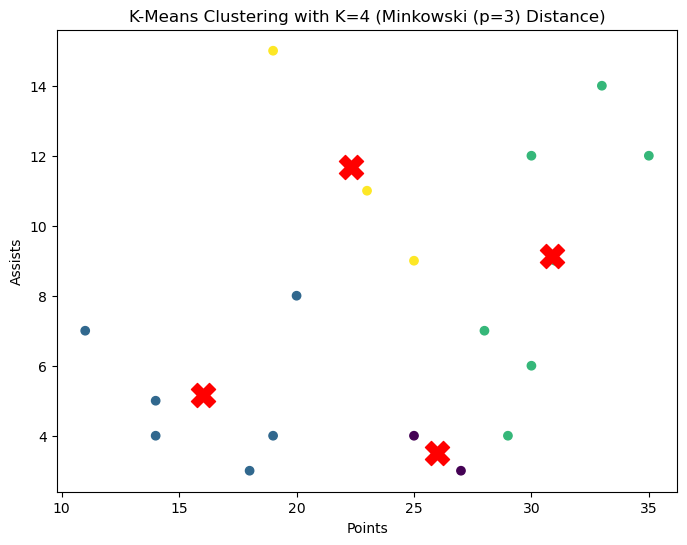

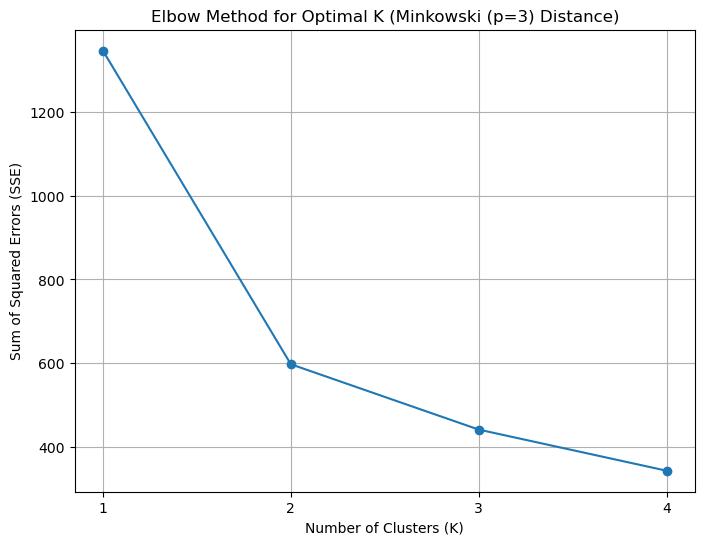

In [8]:
k_values = range(1, 5)

elbow_method(df, k_values, euclidean_distance, 'Euclidean')
elbow_method(df, k_values, manhattan_distance, 'Manhattan')
elbow_method(df, k_values, minkowski_distance, 'Minkowski (p=3)')